<a href="https://colab.research.google.com/github/Topofajar/Travt_Recommendation-System/blob/main/ML_Collaborative_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Input, Embedding, Concatenate, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.models import Model
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

In [2]:
# Load datasets
tourist_resto_data = pd.read_csv("https://raw.githubusercontent.com/Topofajar/Travt_Recommendation-System/main/Dataset/Tourist%20and%20Resto%20Data.csv")
rating_data = pd.read_csv("https://raw.githubusercontent.com/Topofajar/Travt_Recommendation-System/main/Dataset/Rating%20Data.csv")
user_data = pd.read_csv("https://raw.githubusercontent.com/Topofajar/Travt_Recommendation-System/main/Dataset/User%20Data.csv")


In [3]:
# Check columns
print("Tourist and Resto Data columns:", tourist_resto_data.columns)
print("Rating Data columns:", rating_data.columns)
print("User Data columns:", user_data.columns)

Tourist and Resto Data columns: Index(['place_id', 'place_maps_id', 'name', 'site', 'subtypes', 'category',
       'phone', 'full_address', 'city', 'latitude', 'longitude', 'location',
       'rating', 'total rating', 'reviews_link', 'rating_per_score_1',
       'rating_per_score_2', 'rating_per_score_3', 'rating_per_score_4',
       'rating_per_score_5', 'photos_count', 'photo 1', 'photo 2', 'photo 3',
       'photo 4', 'working_hours', 'about', 'description', 'verified',
       'location_link', 'reviews_id'],
      dtype='object')
Rating Data columns: Index(['user_id', 'place_id', 'rating', 'review'], dtype='object')
User Data columns: Index(['user_id', 'location', 'age', 'gender'], dtype='object')


In [4]:
# Merge datasets
merged_data = pd.merge(rating_data, tourist_resto_data, on='place_id')
merged_data

,user_id,place_id,rating_x,review,place_maps_id,name,site,subtypes,category,phone,...,photo 1,photo 2,photo 3,photo 4,working_hours,about,description,verified,location_link,reviews_id
0,21210,1,1,NaN,ChIJiV-3wTiPei4Rgk7HniCGdS0,Tidar Hill,-,"Tourist attraction, National forest, Nature pr...",attractions,+62 293 3193978,...,https://lh5.googleusercontent.com/p/AF1QipMG5c...,https://lh5.googleusercontent.com/p/AF1QipOWBM...,https://lh5.googleusercontent.com/p/AF1QipPDos...,https://lh5.googleusercontent.com/p/AF1QipMwCn...,"{""Monday"": ""Open 24 hours"", ""Tuesday"": ""Open 2...","{""Accessibility"": {""Assistive hearing loop"": t...",Tidar Hill adalah destinasi wisata alam yang t...,True,https://www.google.com/maps/place/Tidar+Hill/@...,3275671778642841218
1,16382,1,1,NaN,ChIJiV-3wTiPei4Rgk7HniCGdS0,Tidar Hill,-,"Tourist attraction, National forest, Nature pr...",attractions,+62 293 3193978,...,https://lh5.googleusercontent.com/p/AF1QipMG5c...,https://lh5.googleusercontent.com/p/AF1QipOWBM...,https://lh5.googleusercontent.com/p/AF1QipPDos...,https://lh5.googleusercontent.com/p/AF1QipMwCn...,"{""Monday"": ""Open 24 hours"", ""Tuesday"": ""Open 2...","{""Accessibility"": {""Assistive hearing loop"": t...",Tidar Hill adalah destinasi wisata alam yang t...,True,https://www.google.com/maps/place/Tidar+Hill/@...,3275671778642841218
2,12739,1,1,NaN,ChIJiV-3wTiPei4Rgk7HniCGdS0,Tidar Hill,-,"Tourist attraction, National forest, Nature pr...",attractions,+62 293 3193978,...,https://lh5.googleusercontent.com/p/AF1QipMG5c...,https://lh5.googleusercontent.com/p/AF1QipOWBM...,https://lh5.googleusercontent.com/p/AF1QipPDos...,https://lh5.googleusercontent.com/p/AF1QipMwCn...,"{""Monday"": ""Open 24 hours"", ""Tuesday"": ""Open 2...","{""Accessibility"": {""Assistive hearing loop"": t...",Tidar Hill adalah destinasi wisata alam yang t...,True,https://www.google.com/maps/place/Tidar+Hill/@...,3275671778642841218
3,23297,1,1,NaN,ChIJiV-3wTiPei4Rgk7HniCGdS0,Tidar Hill,-,"Tourist attraction, National forest, Nature pr...",attractions,+62 293 3193978,...,https://lh5.googleusercontent.com/p/AF1QipMG5c...,https://lh5.googleusercontent.com/p/AF1QipOWBM...,https://lh5.googleusercontent.com/p/AF1QipPDos...,https://lh5.googleusercontent.com/p/AF1QipMwCn...,"{""Monday"": ""Open 24 hours"", ""Tuesday"": ""Open 2...","{""Accessibility"": {""Assistive hearing loop"": t...",Tidar Hill adalah destinasi wisata alam yang t...,True,https://www.google.com/maps/place/Tidar+Hill/@...,3275671778642841218
4,10654,1,1,NaN,ChIJiV-3wTiPei4Rgk7HniCGdS0,Tidar Hill,-,"Tourist attraction, National forest, Nature pr...",attractions,+62 293 3193978,...,https://lh5.googleusercontent.com/p/AF1QipMG5c...,https://lh5.googleusercontent.com/p/AF1QipOWBM...,https://lh5.googleusercontent.com/p/AF1QipPDos...,https://lh5.googleusercontent.com/p/AF1QipMwCn...,"{""Monday"": ""Open 24 hours"", ""Tuesday"": ""Open 2...","{""Accessibility"": {""Assistive hearing loop"": t...",Tidar Hill adalah destinasi wisata alam yang t...,True,https://www.google.com/maps/place/Tidar+Hill/@...,3275671778642841218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611638,12428,742,5,NaN,ChIJiUwaAQPKei4RQicx-j_Z8D0,Martabak Sinar Senayan,-,"Murtabak restaurant, Takeout restaurant",restaurants,-,...,https://lh5.googleusercontent.com/p/AF1QipMirM...,https://lh5.googleusercontent.com/p/AF1QipM49z...,https://lh5.googleusercontent.com/p/AF1QipN_dp...,https://lh5.googleusercontent.com/p/AF1QipMBiJ...,"{""Monday"": ""4.00-11.00pm"", ""Tuesday"": ""4.00-11...","{""Service options"": {""Outdoor seating"": true, ...",Martabak Sinar Senayan adalah restoran murtaba...,False,https://www.google.com/maps/place/Martabak+Sin...,4463306099527853890
611639,13662,742,5,NaN,ChIJiUwaAQPKei4RQicx-j_Z8D0,Martabak Sinar Senayan,-,"Murtabak restaurant, Takeout restaurant",restaurants,-,...,https://lh5.googleusercontent.com/p/AF1QipMirM...,https://lh5.googleusercontent.com/p/AF1QipM49z...,https://lh

In [5]:
# Select relevant columns
merged_data = merged_data[['user_id', 'place_id', 'rating_x', 'category', 'city', 'rating_y', 'verified']]

# Rename columns for clarity
merged_data.columns = ['user_id', 'place_id', 'rating_user', 'category', 'city', 'rating_place', 'verified']
merged_data


,user_id,place_id,rating_user,category,city,rating_place,verified
0,21210,1,1,attractions,Magelang City,4.5,True
1,16382,1,1,attractions,Magelang City,4.5,True
2,12739,1,1,attractions,Magelang City,4.5,True
3,23297,1,1,attractions,Magelang City,4.5,True
4,10654,1,1,attractions,Magelang City,4.5,True
...,...,...,...,...,...,...,...
611638,12428,742,5,restaurants,Kebumen Regency,4.4,False
611639,13662,742,5,restaurants,Kebumen Regency,4.4,False
611640,26866,742,5,restaurants,Kebumen Regency,4.4,False
611641,26188,742,5,restaurants,Kebumen Regency,4.4,False


In [6]:
place_data = tourist_resto_data[['place_id', 'rating', 'category', 'city', 'verified']]
place_data

,place_id,rating,category,city,verified
0,1,4.5,attractions,Magelang City,True
1,2,4.2,attractions,Magelang City,False
2,3,4.3,attractions,Magelang City,True
3,4,4.5,attractions,Magelang City,False
4,5,4.5,attractions,Magelang City,False
...,...,...,...,...,...
737,738,4.4,restaurants,Kebumen Regency,True
738,739,4.5,restaurants,Kebumen Regency,False
739,740,4.5,restaurants,Kebumen Regency,False
740,741,4.5,restaurants,Kebumen Regency,False


In [7]:
# Create mappings for user, place IDs, category, city, rating_place, verified
user_id_map = {id_: i for i, id_ in enumerate(merged_data['user_id'].unique())}
place_id_map = {id_: i for i, id_ in enumerate(merged_data['place_id'].unique())}
category_map = {id_: i for i, id_ in enumerate(merged_data['category'].unique())}
city_map = {id_: i for i, id_ in enumerate(merged_data['city'].unique())}
rating_place_map = {id_: i for i, id_ in enumerate(merged_data['rating_place'].unique())}
verified_map = {id_: i for i, id_ in enumerate(merged_data['verified'].unique())}

# Map user and place IDs to integers
merged_data['user_id'] = merged_data['user_id'].map(user_id_map)+1
merged_data['place_id'] = merged_data['place_id'].map(place_id_map)+1
merged_data['category'] = merged_data['category'].map(category_map)
merged_data['city'] = merged_data['city'].map(city_map)
merged_data['rating_place'] = merged_data['rating_place'].map(rating_place_map)
merged_data['verified'] = merged_data['verified'].map(verified_map)

<ipython-input-7-4c0ad5183baf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['user_id'] = merged_data['user_id'].map(user_id_map)+1
<ipython-input-7-4c0ad5183baf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['place_id'] = merged_data['place_id'].map(place_id_map)+1
<ipython-input-7-4c0ad5183baf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [8]:
merged_data

,user_id,place_id,rating_user,category,city,rating_place,verified
0,1,1,1,0,0,0,0
1,2,1,1,0,0,0,0
2,3,1,1,0,0,0,0
3,4,1,1,0,0,0,0
4,5,1,1,0,0,0,0
...,...,...,...,...,...,...,...
611638,4780,742,5,1,7,4,1
611639,12447,742,5,1,7,4,1
611640,5203,742,5,1,7,4,1
611641,16386,742,5,1,7,4,1


In [9]:
place_data = tourist_resto_data[['place_id',	'category',	'city',	'rating',	'verified']]
place_data

,place_id,category,city,rating,verified
0,1,attractions,Magelang City,4.5,True
1,2,attractions,Magelang City,4.2,False
2,3,attractions,Magelang City,4.3,True
3,4,attractions,Magelang City,4.5,False
4,5,attractions,Magelang City,4.5,False
...,...,...,...,...,...
737,738,restaurants,Kebumen Regency,4.4,True
738,739,restaurants,Kebumen Regency,4.5,False
739,740,restaurants,Kebumen Regency,4.5,False
740,741,restaurants,Kebumen Regency,4.5,False


In [10]:
place_data['place_id'] = place_data['place_id'].map(place_id_map)+1
place_data['rating'] = place_data['rating'].map(rating_place_map)
place_data['category'] = place_data['category'].map(category_map)
place_data['city'] = place_data['city'].map(city_map)
place_data['verified'] = place_data['verified'].map(verified_map)

place_data

<ipython-input-10-e1be1b6c8c32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  place_data['place_id'] = place_data['place_id'].map(place_id_map)+1
<ipython-input-10-e1be1b6c8c32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  place_data['rating'] = place_data['rating'].map(rating_place_map)
<ipython-input-10-e1be1b6c8c32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,place_id,category,city,rating,verified
0,1,0,0,0,0
1,2,0,0,1,1
2,3,0,0,2,0
3,4,0,0,0,1
4,5,0,0,0,1
...,...,...,...,...,...
737,738,1,7,4,0
738,739,1,7,0,1
739,740,1,7,0,1
740,741,1,7,0,1


In [11]:
place_data.to_csv('place_data.csv', index=False)

In [12]:
# Split data into training and testing sets
train, test = train_test_split(merged_data, test_size=0.2, random_state=42)

# Number of unique user, place IDs, category, city, rating_place, verified
n_users = len(user_id_map)
n_places = len(place_id_map)
n_categorys = len(category_map)
n_citys = len(city_map)
n_rating_places = len(rating_place_map)
n_verifieds = len(verified_map)

print('n_users', n_users)
print('n_places', n_places)
print('n_categorys', n_categorys)
print('n_citys', n_citys)
print('n_rating_places', n_rating_places)
print('n_verifieds', n_verifieds)

n_users 27499
n_places 742
n_categorys 2
n_citys 8
n_rating_places 16
n_verifieds 2


In [13]:
# Define input layers
user_input = Input(shape=(1,), name='user_input')
place_input = Input(shape=(1,), name='place_input')
category_input = Input(shape=(1,), name='category_input')
city_input = Input(shape=(1,), name='city_input')
rating_place_input = Input(shape=(1,), name='rating_place_input')
verified_input = Input(shape=(1,), name='verified_input')


# User and place embeddings
user_embedding = Embedding(output_dim=50, input_dim=n_users, input_length=1)(user_input)
place_embedding = Embedding(output_dim=50, input_dim=n_places, input_length=1)(place_input)
category_embedding = Embedding(output_dim=50, input_dim=n_categorys, input_length=1)(category_input)
city_embedding = Embedding(output_dim=50, input_dim=n_citys, input_length=1)(city_input)
rating_place_embedding = Embedding(output_dim=50, input_dim=n_rating_places, input_length=1)(rating_place_input)
verified_embedding = Embedding(output_dim=50, input_dim=n_verifieds, input_length=1)(verified_input)

# Flatten embeddings
user_flat = Flatten()(user_embedding)
place_flat = Flatten()(place_embedding)
category_flat = Flatten()(category_embedding)
city_flat = Flatten()(city_embedding)
rating_flat = Flatten()(rating_place_embedding)
verified_flat = Flatten()(verified_embedding)

# Concatenate user and place embeddings
concat = Concatenate()([user_flat, place_flat, category_flat, city_flat, rating_flat, verified_flat])

In [14]:
# BatchNormalization
batch_norm = BatchNormalization()(concat)

# Dense layers with L2 regularization
dense1 = Dense(128, activation='relu', kernel_regularizer=l2(0.1))(batch_norm)
dropout1 = Dropout(0.7)(dense1)  # Increase dropout rate
dense2 = Dense(64, activation='relu', kernel_regularizer=l2(0.1))(dropout1)
dropout2 = Dropout(0.7)(dense2)  # Increase dropout rate

# Output layer
output = Dense(1, activation='linear')(dropout2)

In [15]:
# Model
model = Model(inputs=[user_input, place_input, category_input, city_input, rating_place_input, verified_input], outputs=output)

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0005))

# Summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 place_input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 category_input (InputLayer  [(None, 1)]                  0         []                            
 )                                                                                                
                                                                                                  
 city_input (InputLayer)     [(None, 1)]                  0         []                        

In [16]:
# Fit the model
history = model.fit([train.user_id, train.place_id, train.category, train.city, train.rating_place, train.verified], train.rating_user,
                    epochs=20, batch_size=64,
                    validation_data=([test.user_id, test.place_id, test.category, test.city, test.rating_place, test.verified], test.rating_user))

Epoch 1/20
7646/7646 [==============================] - 82s 9ms/step - loss: 3.7764 - val_loss: 0.8717
Epoch 2/20
7646/7646 [==============================] - 60s 8ms/step - loss: 0.9470 - val_loss: 0.8408
Epoch 3/20
7646/7646 [==============================] - 58s 8ms/step - loss: 0.8396 - val_loss: 0.8408
Epoch 4/20
7646/7646 [==============================] - 59s 8ms/step - loss: 0.8299 - val_loss: 0.8484
Epoch 5/20
7646/7646 [==============================] - 58s 8ms/step - loss: 0.8243 - val_loss: 0.8559
Epoch 6/20
7646/7646 [==============================] - 57s 8ms/step - loss: 0.8205 - val_loss: 0.8527
Epoch 7/20
7646/7646 [==============================] - 57s 7ms/step - loss: 0.8176 - val_loss: 0.8550
Epoch 8/20
7646/7646 [==============================] - 60s 8ms/step - loss: 0.8148 - val_loss: 0.8577
Epoch 9/20
7646/7646 [==============================] - 58s 8ms/step - loss: 0.8126 - val_loss: 0.8513
Epoch 10/20
7646/7646 [==============================] - 58s 8ms/step - l

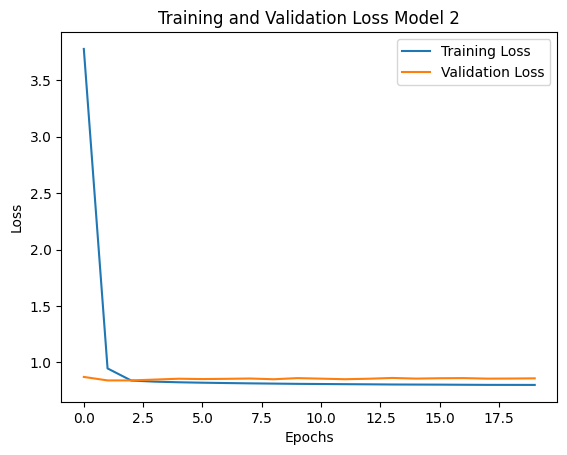

In [17]:
import matplotlib.pyplot as plt

# Plot training loss starting from epoch 3
plt.plot(history.epoch, history.history['loss'], label='Training Loss')

# Plot validation loss starting from epoch 3
plt.plot(history.epoch, history.history['val_loss'], label='Validation Loss')

# Adding labels and title
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Model 2")

# Adding legend
plt.legend()

# Show the plot
plt.show()


In [18]:
model.save('best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
import time

# Define the path to save the model
saved_model_path = "/tmp/saved_models/{}".format(int(time.time()))

In [20]:
# Save the model in the TensorFlow SavedModel format
model.save(saved_model_path, save_format='tf')

In [22]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 105.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 109.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
   

In [23]:
!tensorflowjs_converter \
 --input_format=tf_saved_model \
 /tmp/saved_models/1718332528 \
 /tmp/model

2024-06-14 02:38:48.340512: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-14 02:38:52.204046: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
